In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
data_base_path_ema = '../data/with-ema'
data_base_path_no_ema = '../data/no-ema'
sizes = [
        "pythia-70m-deduped", "pythia-160m-deduped",
        "pythia-410m-deduped", "pythia-1b-deduped",
        "pythia-1.4b-deduped", "pythia-2.8b-deduped",
        "pythia-6.9b-deduped", "pythia-12b-deduped"
    ]


def analyze_ppl_across_models(sizes, window, data_base_path):
    """
    Analyze perplexity across different model sizes and create visualization plots.
    
    Parameters:
    sizes (list): List of model size names
    window (int): Window size for analysis
    data_base_path (str): Base path to the data files
    transform_for_plotting_func (function): Function to transform data for plotting
    
    Returns:
    tuple: Figure object, max_results list, and avg_results list
    """
    # Create figure with 4x4 grid
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))
    axes = axes.flatten()  # Flatten to make indexing easier

    # Plot each model's data
    max_results = []
    avg_results = []
    
    for idx, size in enumerate(sizes):
        # Read and process data
        path = f'{data_base_path}/sliding_windows/{window}/{size}-ellen.jsonl'
        col_name = f'{size}_window_ppls'
        ppl_df = pd.read_json(path_or_buf=path, lines=True)
        transform_for_plotting(
            df=ppl_df,
            list_column=col_name,
            label_column="disorganization_subscale",
            model_name=size,
            label_name="Modified PANSS",
            ax=axes[idx],
            window=window
        )   
        # Calculate and store statistics
        ppl_df['max_values'] = ppl_df[col_name].apply(lambda x: max(x) if x else None)
        max_r = scipy.stats.spearmanr(ppl_df["max_values"], ppl_df['disorganization_subscale'])
        max_results.append(f"{size}\nSpearman rho: {max_r[0]:.3f}\tp-value: {max_r[1]:.3f}")
        
        avg_r = scipy.stats.spearmanr(ppl_df[f"{size}_avg_ppl"], ppl_df['disorganization_subscale'])
        avg_results.append(f"{size}\nSpearman rho: {avg_r[0]:.3f}\tp-value: {avg_r[1]:.3f}")

    # Add overall title
    fig.suptitle('PPL Analysis Across Different Model Sizes', fontsize=16, y=1.02)

    # Adjust layout
    plt.tight_layout()
    
    return fig, max_results, avg_results

def transform_for_plotting(df, list_column, label_column, model_name, label_name, ax, window):
    """
    Transform and plot data on a specified axis
    """
    # Create rows for each value in the lists
    transformed_data = []
    
    for idx, row in df.iterrows():
        values = row[list_column]
        label = row[label_column]
        
        # Create a row for each value in the list
        for pos, value in enumerate(values):
            transformed_data.append({
                'position': pos,
                'value': value,
                'label': label,
                'series': idx
            })
    
    plotable_df = pd.DataFrame(transformed_data)
    
    # Plot on the specified axis
    sns.lineplot(
        data=plotable_df,
        x='position',
        y='value',
        hue='label',
        markers=True,
        dashes=False,
        ax=ax
    )
    ax.set_xlabel('Index')
    ax.set_ylabel('PPL')
    ax.set_title(f"{label_name} vs {window} Sliding Window PPL\n{model_name}")

## Sliding Window of 8


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.265	p-value: 0.103
pythia-160m-deduped
Spearman rho: 0.414	p-value: 0.009
pythia-410m-deduped
Spearman rho: 0.385	p-value: 0.015
pythia-1b-deduped
Spearman rho: 0.415	p-value: 0.009
pythia-1.4b-deduped
Spearman rho: 0.458	p-value: 0.003
pythia-2.8b-deduped
Spearman rho: 0.425	p-value: 0.007
pythia-6.9b-deduped
Spearman rho: 0.478	p-value: 0.002
pythia-12b-deduped
Spearman rho: 0.441	p-value: 0.005


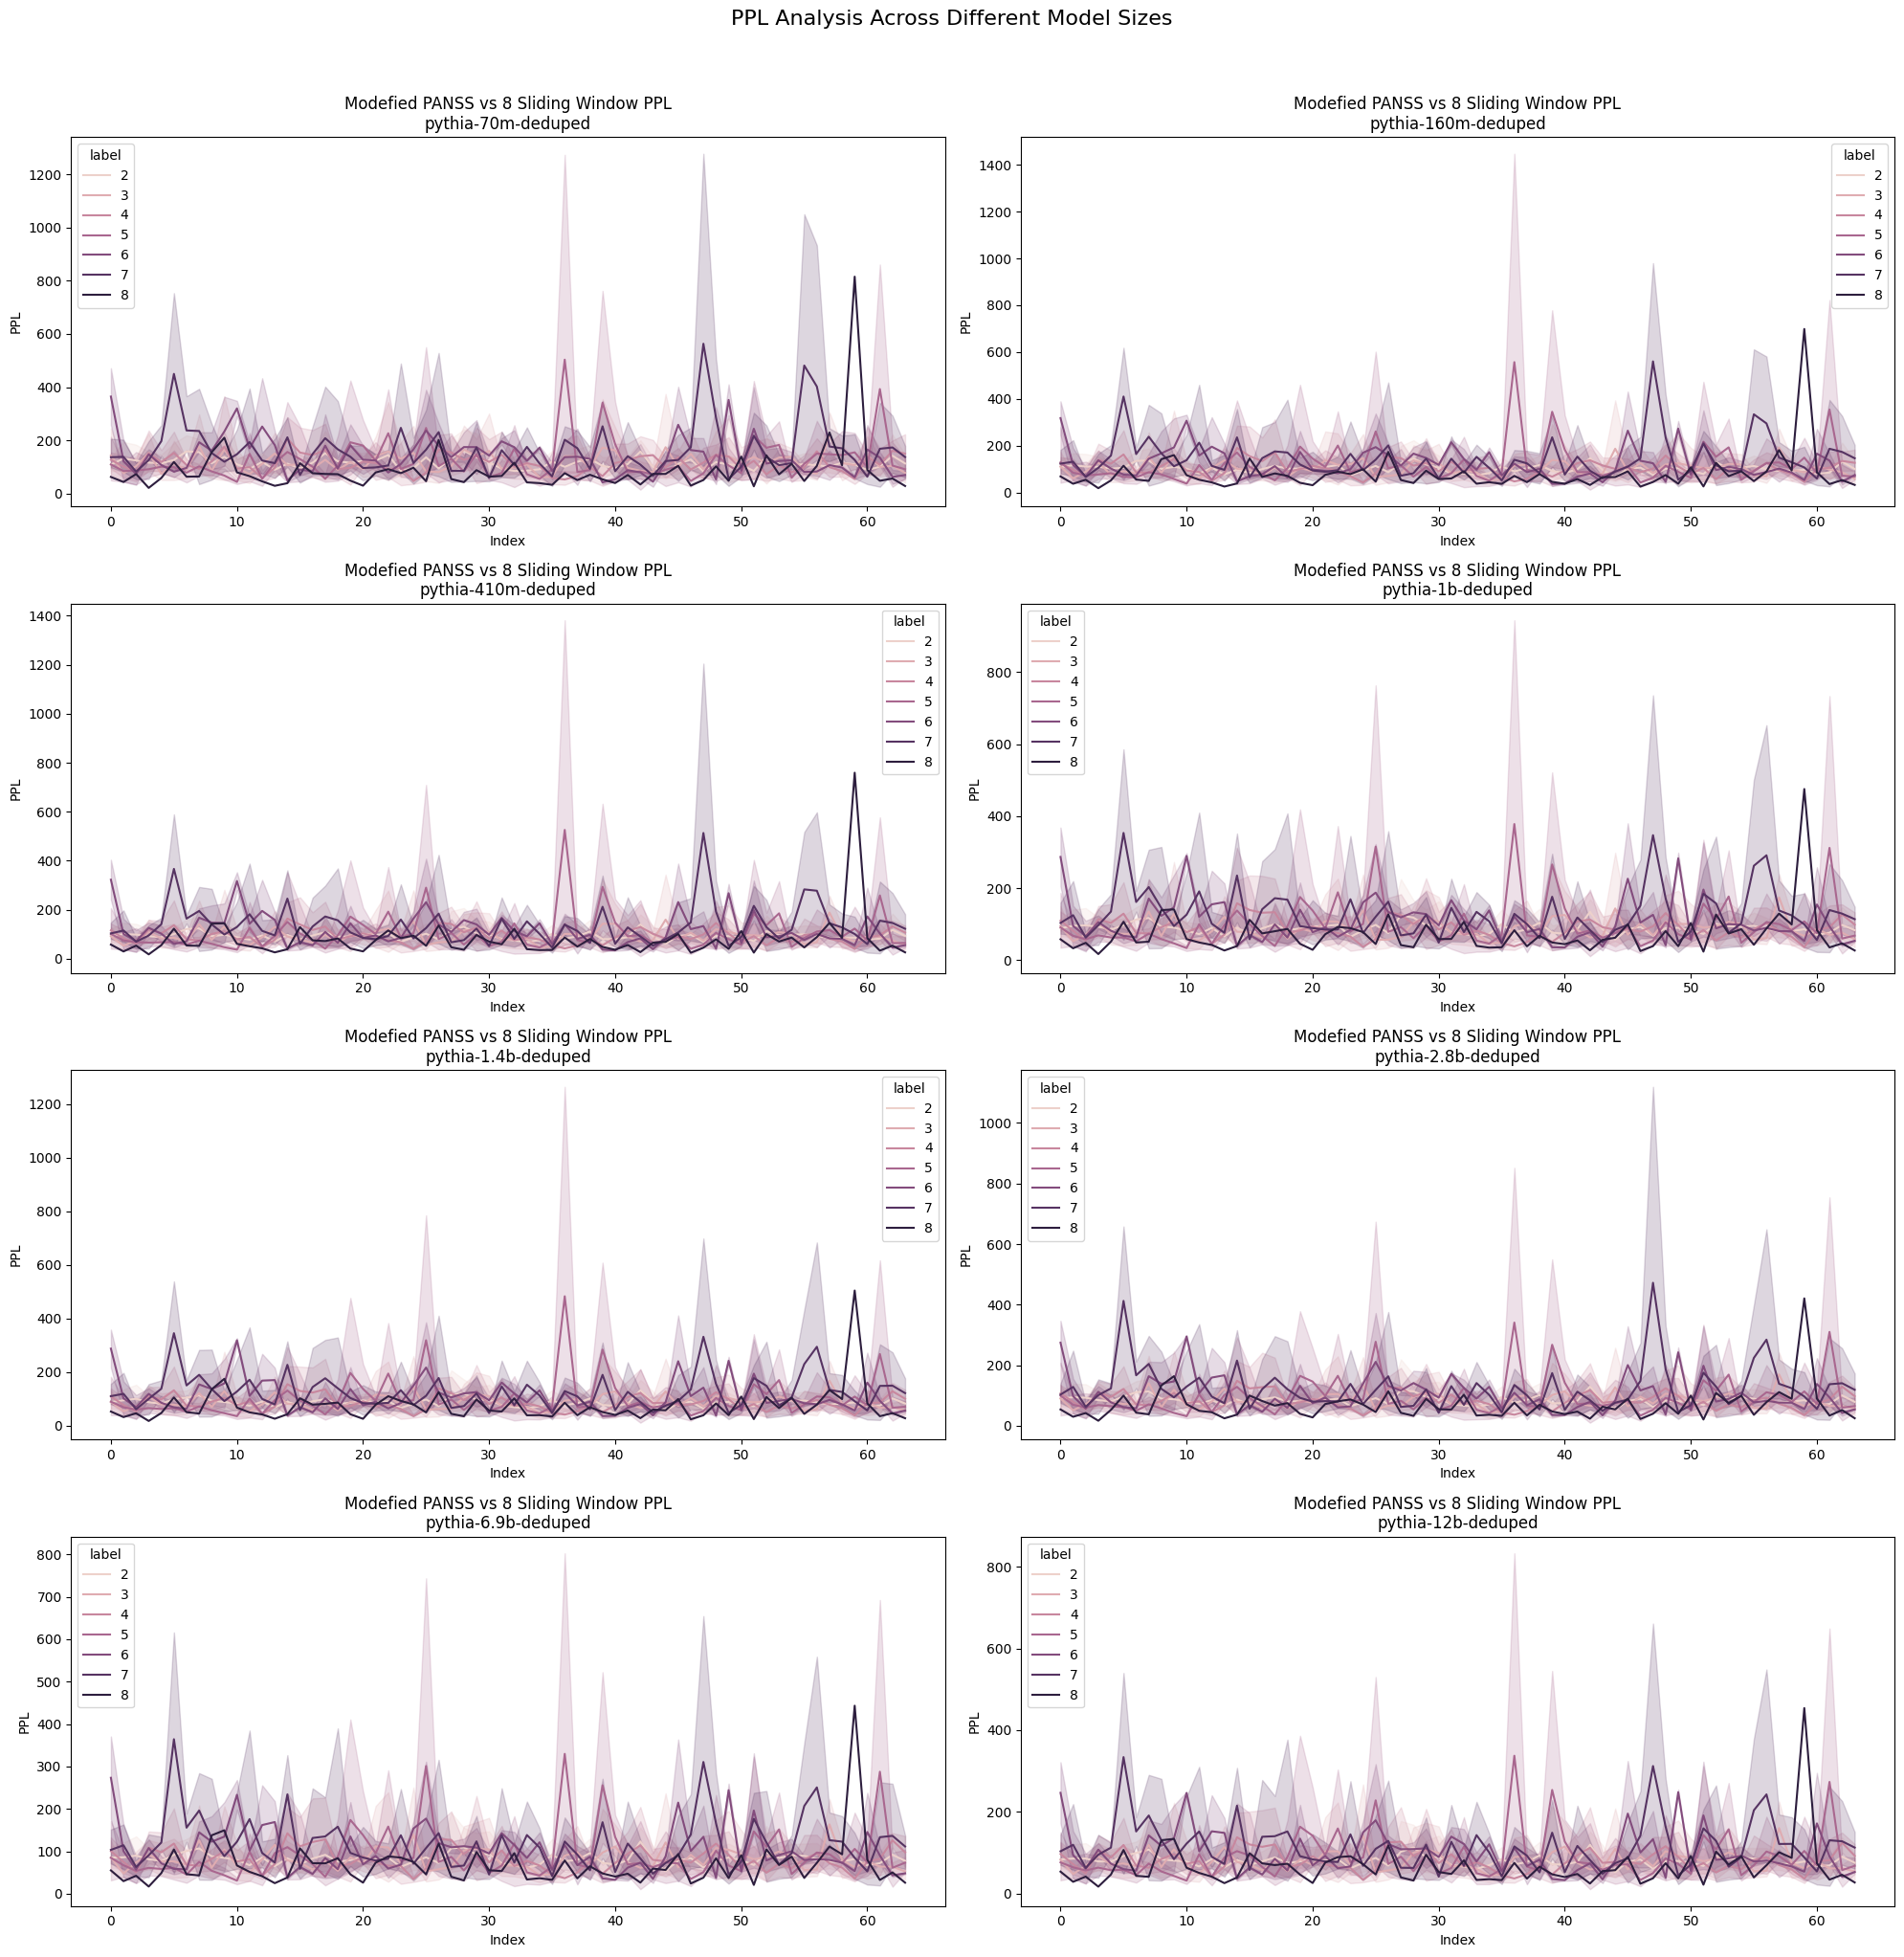

In [22]:
window = 8
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [23]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.258	p-value: 0.113
pythia-160m-deduped
Spearman rho: 0.264	p-value: 0.105
pythia-410m-deduped
Spearman rho: 0.263	p-value: 0.106
pythia-1b-deduped
Spearman rho: 0.266	p-value: 0.101
pythia-1.4b-deduped
Spearman rho: 0.272	p-value: 0.094
pythia-2.8b-deduped
Spearman rho: 0.261	p-value: 0.109
pythia-6.9b-deduped
Spearman rho: 0.269	p-value: 0.098
pythia-12b-deduped
Spearman rho: 0.270	p-value: 0.097


## Sliding Window of 16


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.482	p-value: 0.002
pythia-160m-deduped
Spearman rho: 0.433	p-value: 0.006
pythia-410m-deduped
Spearman rho: 0.439	p-value: 0.005
pythia-1b-deduped
Spearman rho: 0.352	p-value: 0.028
pythia-1.4b-deduped
Spearman rho: 0.370	p-value: 0.021
pythia-2.8b-deduped
Spearman rho: 0.385	p-value: 0.015
pythia-6.9b-deduped
Spearman rho: 0.352	p-value: 0.028
pythia-12b-deduped
Spearman rho: 0.313	p-value: 0.052


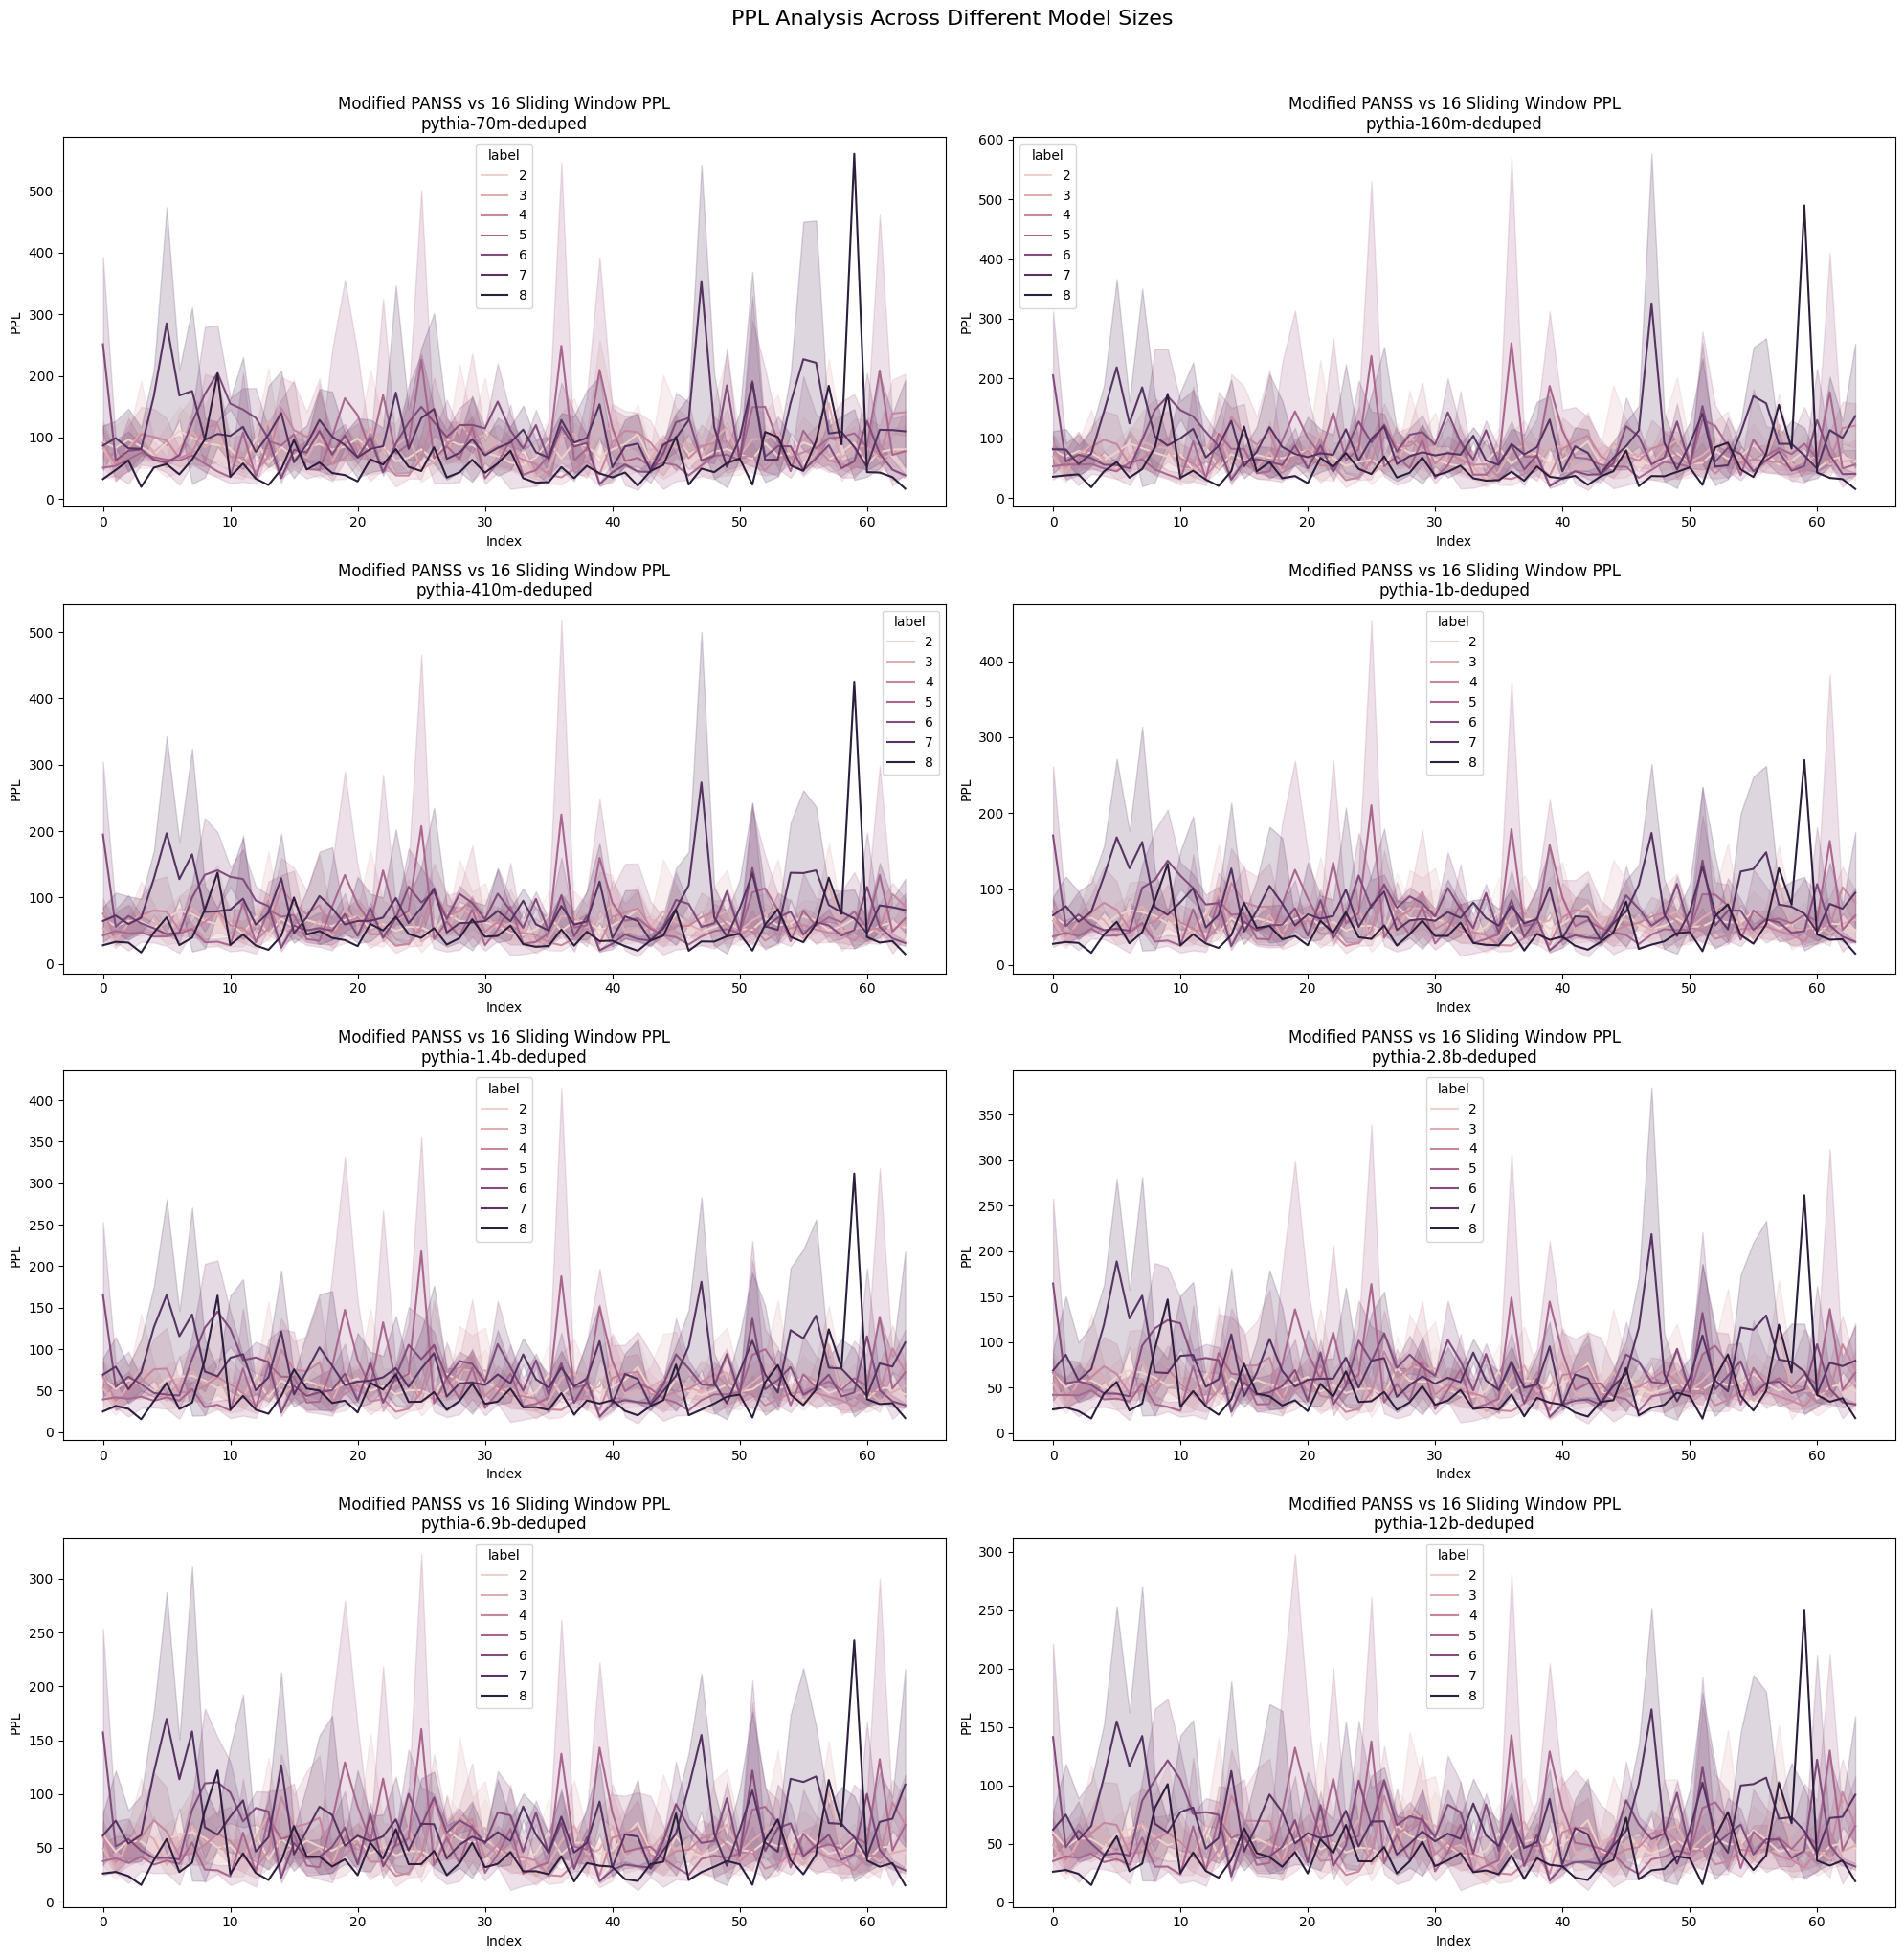

In [3]:
window = 16
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)
fig.savefig("../figs/max_ellen_ppl.pdf", dpi=300)

In [25]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.248	p-value: 0.128
pythia-160m-deduped
Spearman rho: 0.278	p-value: 0.087
pythia-410m-deduped
Spearman rho: 0.276	p-value: 0.089
pythia-1b-deduped
Spearman rho: 0.292	p-value: 0.072
pythia-1.4b-deduped
Spearman rho: 0.334	p-value: 0.038
pythia-2.8b-deduped
Spearman rho: 0.324	p-value: 0.044
pythia-6.9b-deduped
Spearman rho: 0.315	p-value: 0.051
pythia-12b-deduped
Spearman rho: 0.302	p-value: 0.061


## Sliding Window of 32


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.338	p-value: 0.035
pythia-160m-deduped
Spearman rho: 0.316	p-value: 0.050
pythia-410m-deduped
Spearman rho: 0.356	p-value: 0.026
pythia-1b-deduped
Spearman rho: 0.380	p-value: 0.017
pythia-1.4b-deduped
Spearman rho: 0.382	p-value: 0.016
pythia-2.8b-deduped
Spearman rho: 0.369	p-value: 0.021
pythia-6.9b-deduped
Spearman rho: 0.394	p-value: 0.013
pythia-12b-deduped
Spearman rho: 0.404	p-value: 0.011


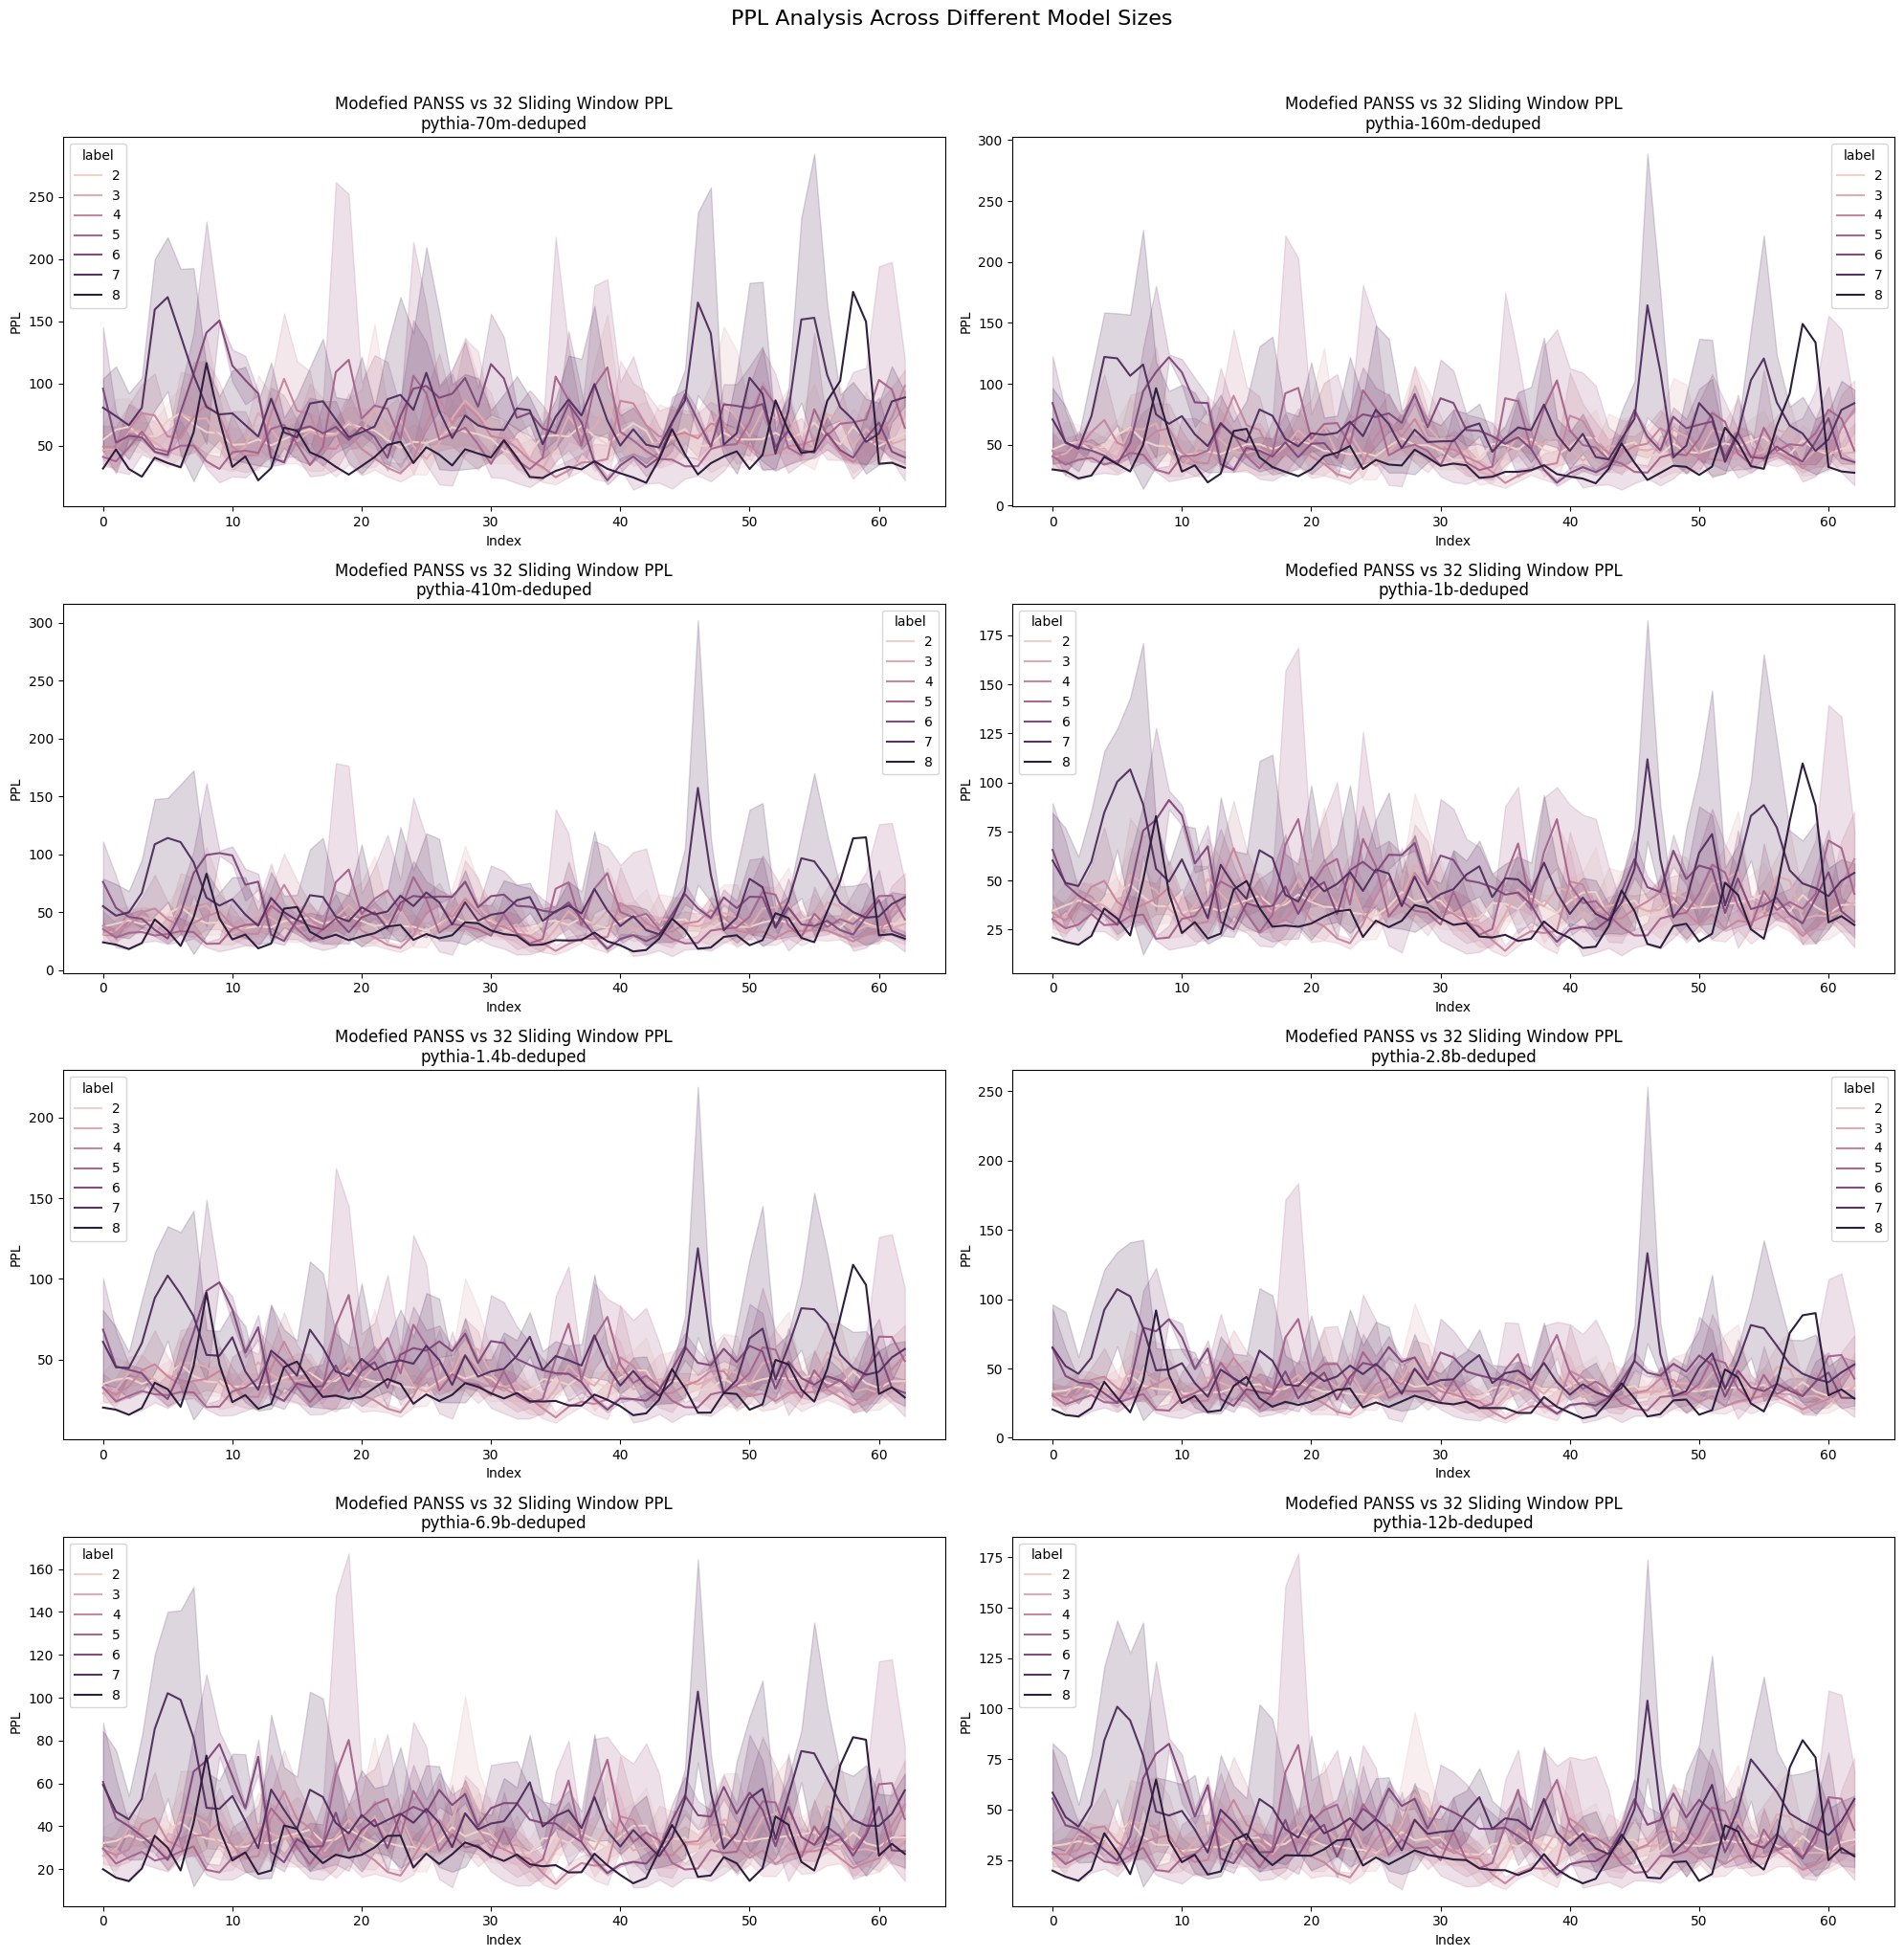

In [26]:
window = 32
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [27]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.274	p-value: 0.092
pythia-160m-deduped
Spearman rho: 0.296	p-value: 0.067
pythia-410m-deduped
Spearman rho: 0.324	p-value: 0.044
pythia-1b-deduped
Spearman rho: 0.318	p-value: 0.048
pythia-1.4b-deduped
Spearman rho: 0.355	p-value: 0.027
pythia-2.8b-deduped
Spearman rho: 0.344	p-value: 0.032
pythia-6.9b-deduped
Spearman rho: 0.342	p-value: 0.033
pythia-12b-deduped
Spearman rho: 0.338	p-value: 0.035


## Sliding Window of 64


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.356	p-value: 0.026
pythia-160m-deduped
Spearman rho: 0.354	p-value: 0.027
pythia-410m-deduped
Spearman rho: 0.379	p-value: 0.017
pythia-1b-deduped
Spearman rho: 0.410	p-value: 0.009
pythia-1.4b-deduped
Spearman rho: 0.418	p-value: 0.008
pythia-2.8b-deduped
Spearman rho: 0.428	p-value: 0.007
pythia-6.9b-deduped
Spearman rho: 0.414	p-value: 0.009
pythia-12b-deduped
Spearman rho: 0.412	p-value: 0.009


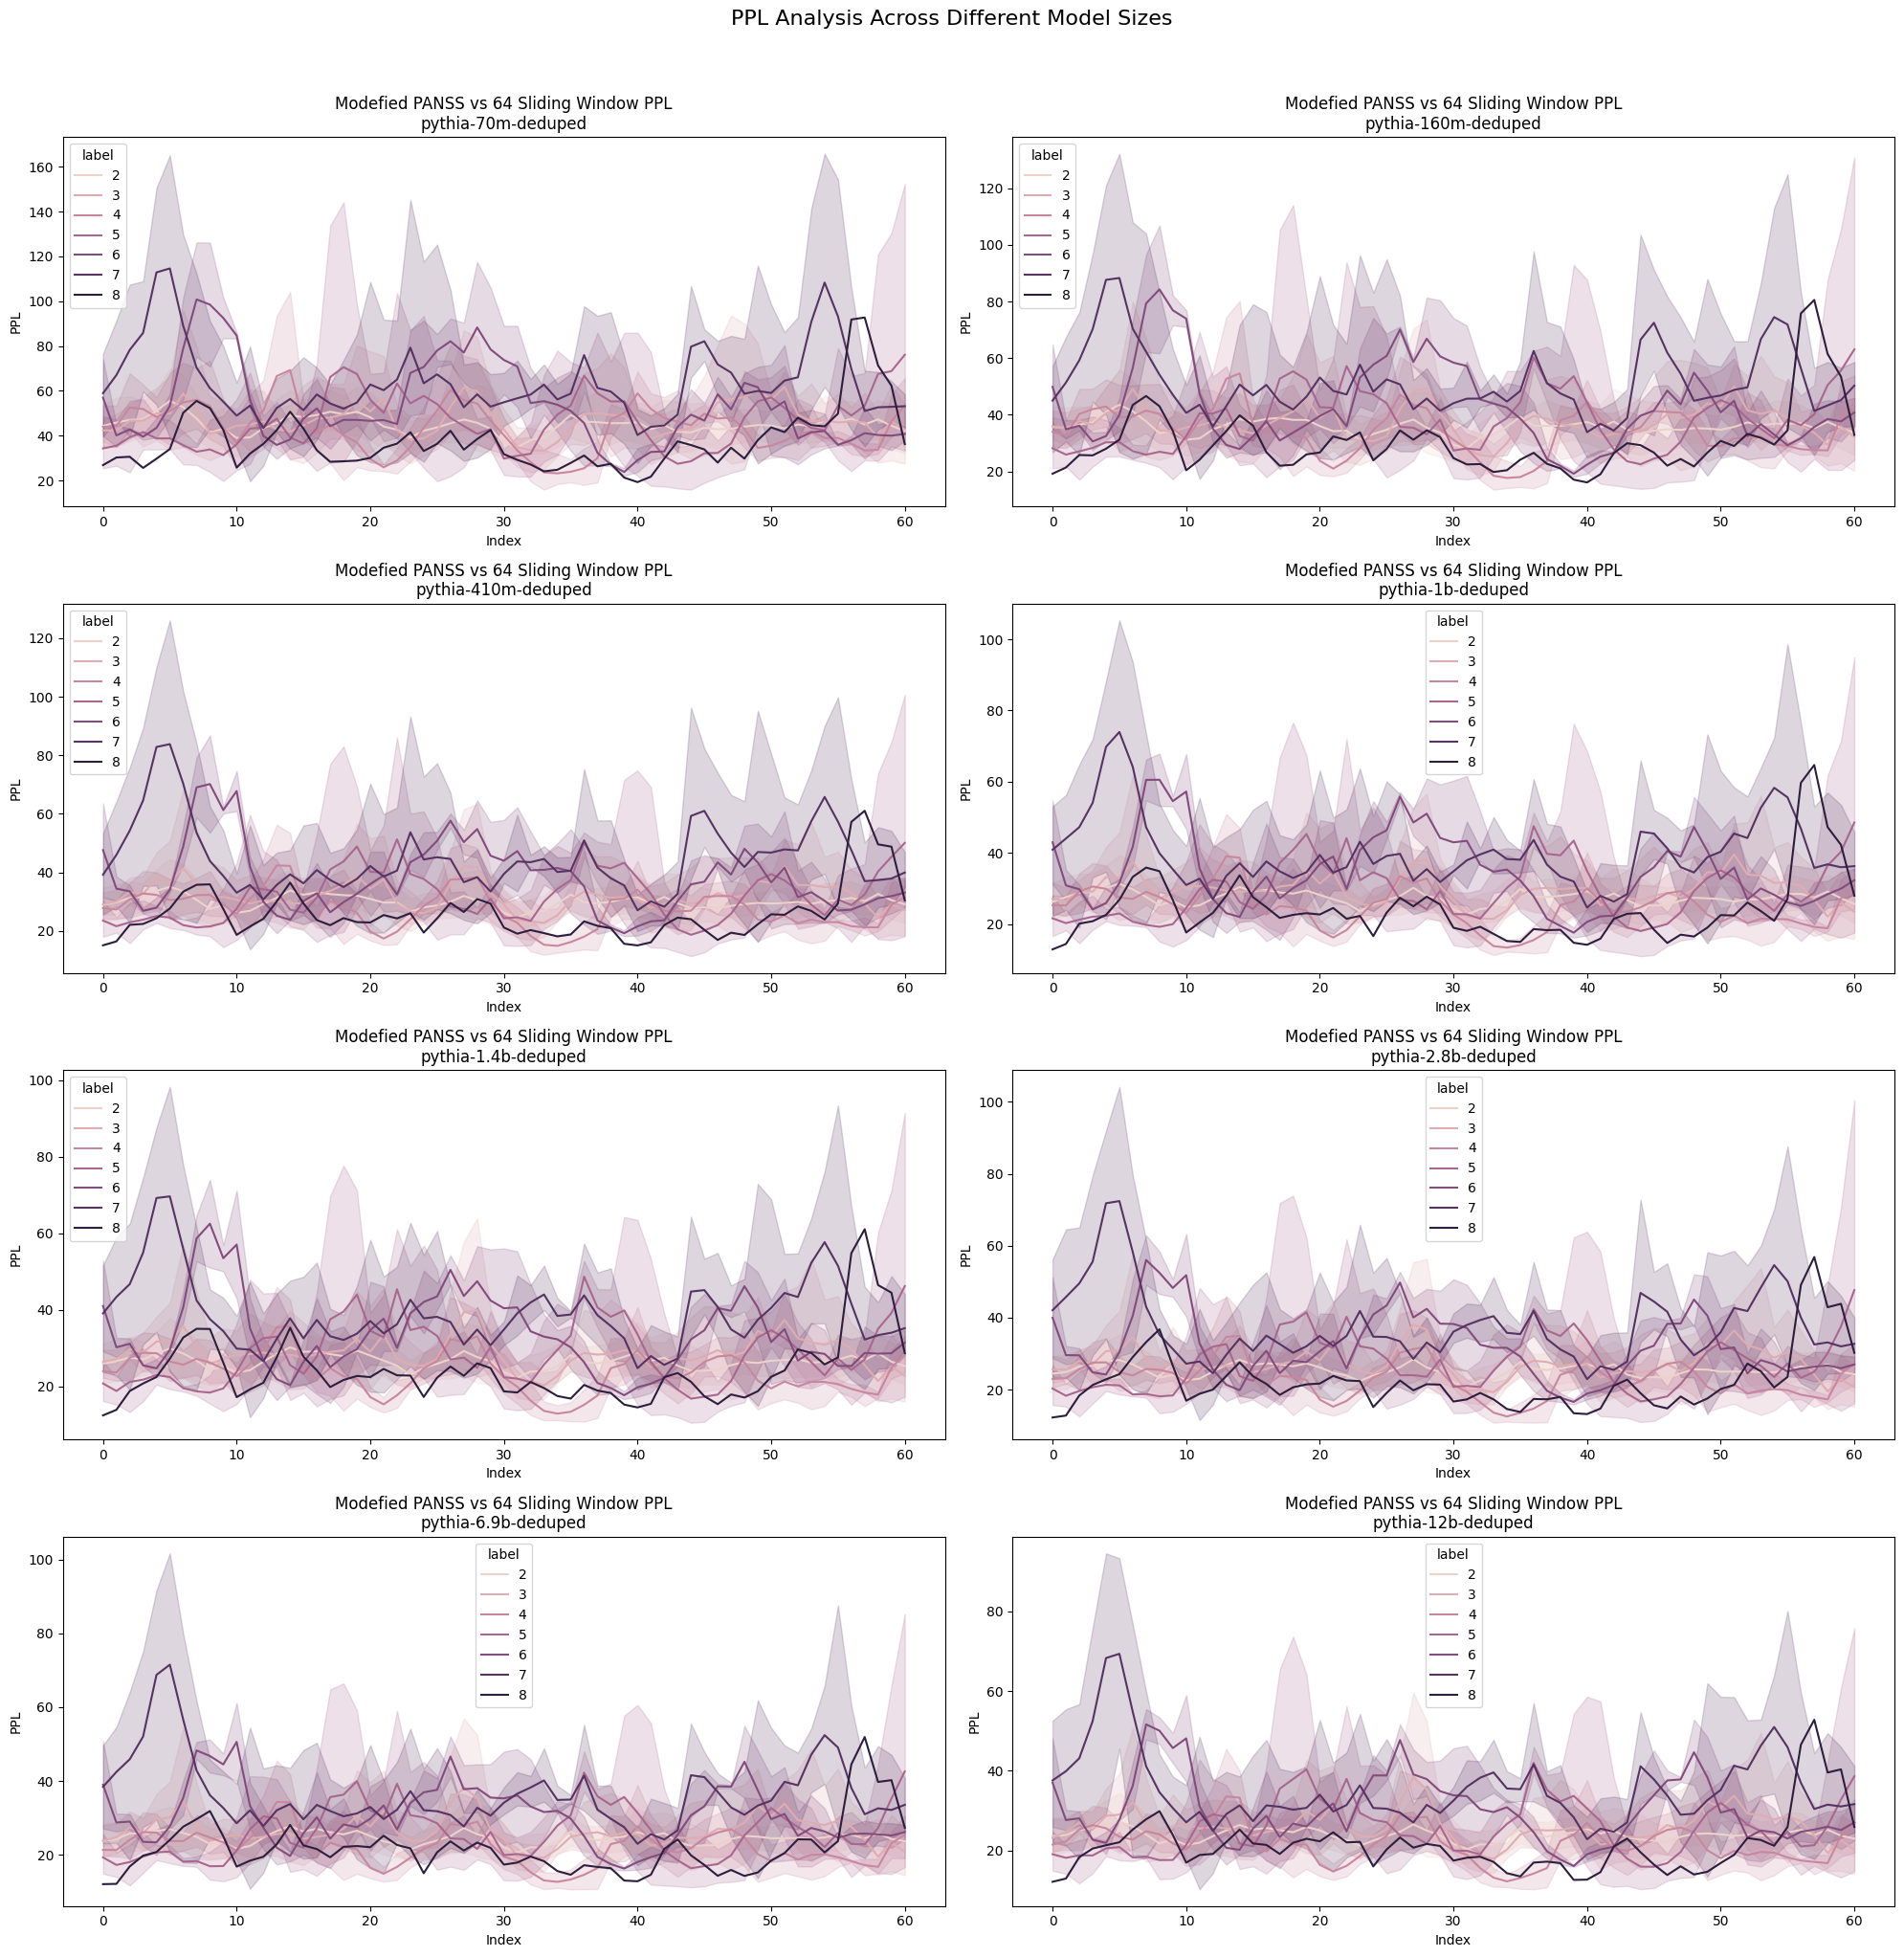

In [28]:
window = 64
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [29]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.276	p-value: 0.089
pythia-160m-deduped
Spearman rho: 0.313	p-value: 0.052
pythia-410m-deduped
Spearman rho: 0.318	p-value: 0.049
pythia-1b-deduped
Spearman rho: 0.330	p-value: 0.040
pythia-1.4b-deduped
Spearman rho: 0.360	p-value: 0.024
pythia-2.8b-deduped
Spearman rho: 0.343	p-value: 0.032
pythia-6.9b-deduped
Spearman rho: 0.315	p-value: 0.051
pythia-12b-deduped
Spearman rho: 0.334	p-value: 0.038


## Sliding Window of 128


Max PPL Results:
pythia-70m-deduped
Spearman rho: 0.344	p-value: 0.032
pythia-160m-deduped
Spearman rho: 0.325	p-value: 0.043
pythia-410m-deduped
Spearman rho: 0.294	p-value: 0.070
pythia-1b-deduped
Spearman rho: 0.313	p-value: 0.052
pythia-1.4b-deduped
Spearman rho: 0.326	p-value: 0.043
pythia-2.8b-deduped
Spearman rho: 0.348	p-value: 0.030
pythia-6.9b-deduped
Spearman rho: 0.368	p-value: 0.021
pythia-12b-deduped
Spearman rho: 0.357	p-value: 0.026


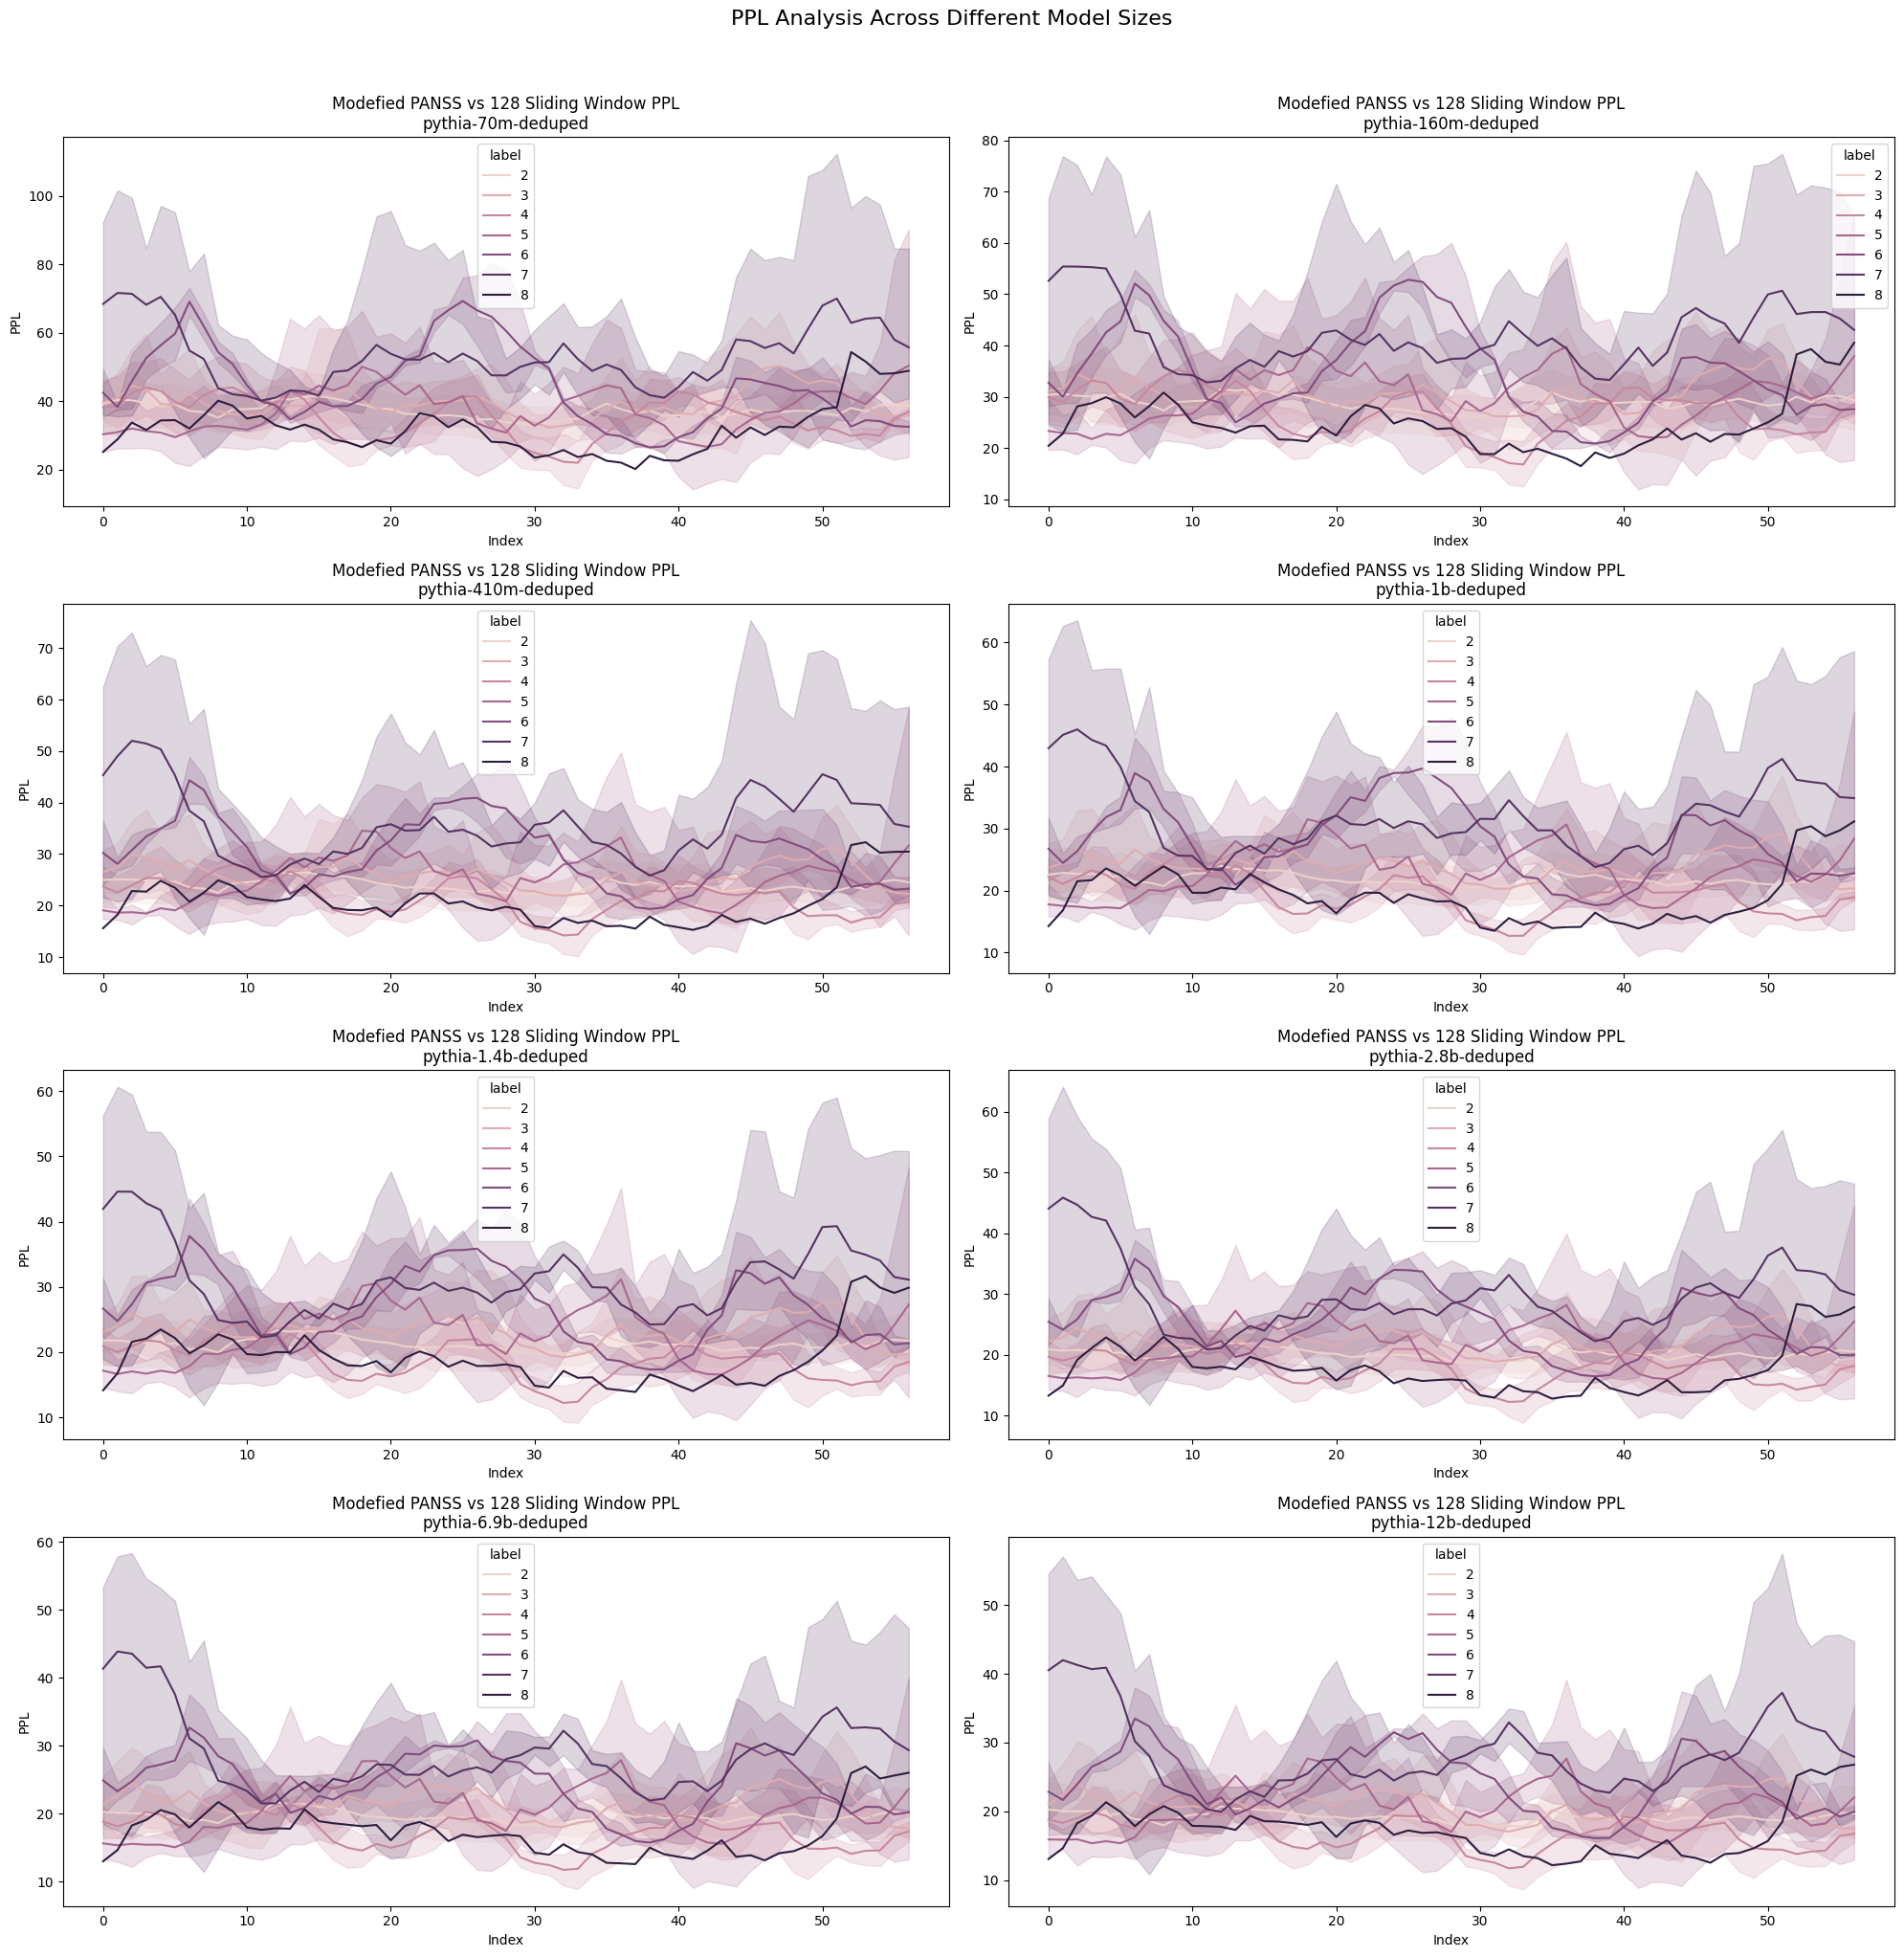

In [30]:
window = 128
fig, max_results, avg_results = analyze_ppl_across_models(
    sizes, window, data_base_path_no_ema
)
print("\nMax PPL Results:")
for result in max_results:
    print(result)

In [31]:
print("\nAverage PPL Results:")
for result in avg_results:
    print(result)


Average PPL Results:
pythia-70m-deduped
Spearman rho: 0.276	p-value: 0.089
pythia-160m-deduped
Spearman rho: 0.294	p-value: 0.069
pythia-410m-deduped
Spearman rho: 0.301	p-value: 0.062
pythia-1b-deduped
Spearman rho: 0.305	p-value: 0.059
pythia-1.4b-deduped
Spearman rho: 0.342	p-value: 0.033
pythia-2.8b-deduped
Spearman rho: 0.325	p-value: 0.043
pythia-6.9b-deduped
Spearman rho: 0.310	p-value: 0.055
pythia-12b-deduped
Spearman rho: 0.326	p-value: 0.043
